In [171]:
import os
import pickle
import matplotlib.pyplot as plt
from scipy.io import loadmat
import h5py
import pandas as pd
import numpy as np

In [2]:
path_imstack = r'\\10.162.80.16\Andre_expansion\data\monkey_fetus\cell_density_validation\im_stack_2_5_new_vol_v3.pkl'

with open(path_imstack, 'rb') as file:
    im_stack = pickle.load(file)

In [3]:
def load_var_from_mat(mat_file_name, varname):

    try:
        data = loadmat(mat_file_name)

        var = data[varname]
    except:
        data = h5py.File(mat_file_name, 'r')

        var = data[varname][()]

    return var

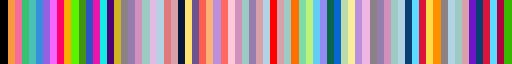

In [4]:
from matplotlib.colors import ListedColormap

cmap_pth = r"\\10.99.68.178\andreex\students\Donald Monkey fetus\codes\monkey\new_cmap_10_16.mat"
cmap_var = load_var_from_mat(cmap_pth, "cmap")
noise_color = np.array([0, 0, 0]).reshape(1,3)
cmap_var = np.concatenate([noise_color, cmap_var], axis=0)/255
#cmap_var = cmap_var/255

cmap_var = ListedColormap(cmap_var)
cmap_var

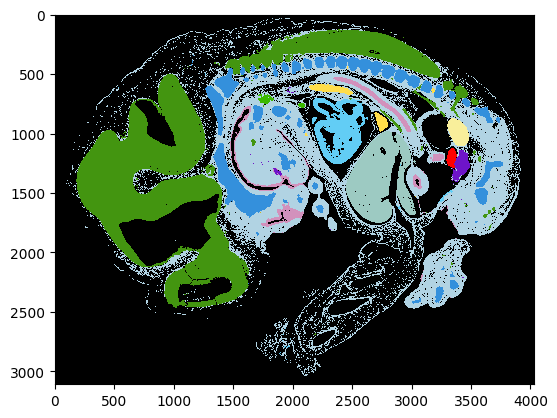

In [5]:
i = 500

im = im_stack[i]

plt.imshow(im, cmap=cmap_var, interpolation='none')
plt.show()

In [248]:
len(old_labels)

83

In [250]:
old_labels = []
for j,im in enumerate(im_stack):
    print(j)
    unique = np.unique(im)
    for val in unique:
        if val not in old_labels:
            old_labels.append(val)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [254]:
old_labels = sorted(old_labels)
print(len(old_labels))

92


In [255]:
new_labels = range(0,len(old_labels))

label_mapping = {old_label: new_label for old_label, new_label in zip(old_labels, new_labels)}

In [256]:
label_mapping

{0: 0,
 1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 6,
 15: 7,
 17: 8,
 18: 9,
 101: 10,
 102: 11,
 103: 12,
 104: 13,
 105: 14,
 106: 15,
 107: 16,
 201: 17,
 202: 18,
 203: 19,
 204: 20,
 205: 21,
 206: 22,
 207: 23,
 208: 24,
 209: 25,
 210: 26,
 211: 27,
 212: 28,
 301: 29,
 302: 30,
 303: 31,
 304: 32,
 305: 33,
 401: 34,
 402: 35,
 403: 36,
 404: 37,
 405: 38,
 406: 39,
 501: 40,
 502: 41,
 503: 42,
 504: 43,
 505: 44,
 506: 45,
 507: 46,
 508: 47,
 509: 48,
 510: 49,
 601: 50,
 602: 51,
 603: 52,
 604: 53,
 605: 54,
 606: 55,
 607: 56,
 701: 57,
 702: 58,
 703: 59,
 801: 60,
 802: 61,
 803: 62,
 804: 63,
 805: 64,
 806: 65,
 807: 66,
 901: 67,
 902: 68,
 903: 69,
 904: 70,
 905: 71,
 1001: 72,
 1002: 73,
 1003: 74,
 1004: 75,
 1005: 76,
 1101: 77,
 1102: 78,
 1103: 79,
 1104: 80,
 1201: 81,
 1202: 82,
 1203: 83,
 1204: 84,
 1205: 85,
 1206: 86,
 1207: 87,
 1301: 88,
 1302: 89,
 1303: 90,
 1304: 91}

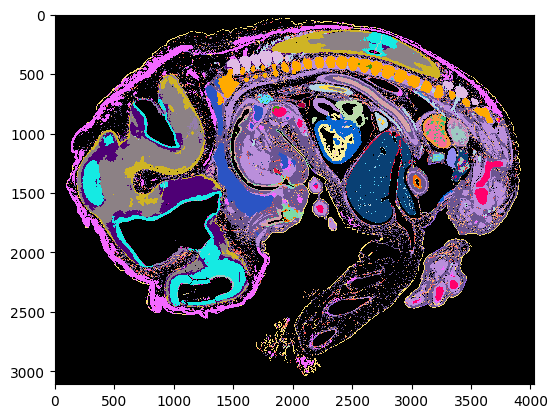

In [257]:
i = 500

im = im_stack[i]
new_im = np.vectorize(label_mapping.get)(im)

plt.imshow(new_im, cmap=cmap_var, interpolation='none')
plt.show()

Load pickled files

In [7]:
pickled_features_path = r'\\10.162.80.16\Andre_expansion\data\monkey_fetus\Stardist\StarDist_12_25_23\stardist_feature_df_pickles'
features_list = os.listdir(pickled_features_path)
features_list = sorted([os.path.join(pickled_features_path,f) for f in features_list if f.endswith('.pkl')])

In [109]:
skipped = [193]

pth_crop_info_dir = r'\\10.99.68.178\andreex\data\monkey fetus\gestational 40\2_5x\cropped_images\bounding_boxes'
crop_mat_list = sorted(os.listdir(pth_crop_info_dir))
crop_mat_list = [file for k, file in enumerate(crop_mat_list) if 'monkey' in file and k not in skipped]

crop_data = []

for i, file in enumerate(sorted(crop_mat_list)):
    mat_file_name = os.path.join(pth_crop_info_dir, file)
    try:
        data = loadmat(mat_file_name)

        #print('scipy.io loadmat')
        bb = [int(x) for x in data['bb']]
        crop_data.append(bb)
        #print(bb)

    except:
        data = h5py.File(mat_file_name, 'r')

        #print('h5py')
        bb = [int(x) for x in data['bb'][()]]
        crop_data.append(bb)
        #print(bb)

In [110]:
pth_pixel_res = r'\\10.99.68.178\andreex\data\monkey fetus\gestational 40\segmentation_analysis\pix_res_info'
pixel_res_info = sorted(os.listdir(pth_pixel_res))
pixel_res_files = [os.path.join(pth_pixel_res,file) for file in pixel_res_info if file.endswith('.mat')]
pixel_res_files_fixed = [j for i, j in enumerate(pixel_res_files) if i not in skipped]

In [115]:
i = 160

crop_data[i]

[1685, 2364, 3431, 2840]

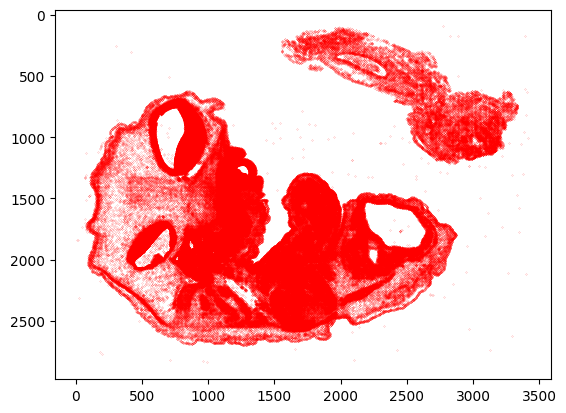

In [316]:
i = 160

with open(features_list[i], 'rb') as file:
    features = pickle.load(file)

pix_res = float(load_var_from_mat(pixel_res_files_fixed[i], 'pix_res')[0][0][0])
downsize2_5x = 4/pix_res
downsize5x = 2/pix_res
crop_file_data = [num*downsize2_5x for num in crop_data[i]]
x_offset = crop_file_data[1] - 1  # 0 to 1 indexing fix, probably right idk
y_offset = crop_file_data[0] - 1

x = features['Centroid_x']
y = features['Centroid_y']

inds = x.index.tolist()  # save ids

x = (features['Centroid_x'] - y_offset) /downsize2_5x
y = (features['Centroid_y'] - x_offset) /downsize2_5x

xy = list(zip(x, y))

xy_filtered_with_indices = [(index, [x, y]) for index, (x, y) in enumerate(xy) if 0 <= x < crop_data[i][2] and 0 <= y < crop_data[i][3]]

inds = [index for index, _ in xy_filtered_with_indices]
xy = np.array([coordinates for _, coordinates in xy_filtered_with_indices])

# xy = np.array([(x, y) for x, y in xy if 0 <= x < crop_data[i][2] and 0 <= y < crop_data[i][3]])

#x = x[x>0 and y >0]
#y = y[y>0]

plt.scatter(xy[:,0], xy[:,1], c='r', s=0.01)
plt.gca().invert_yaxis()
plt.show()

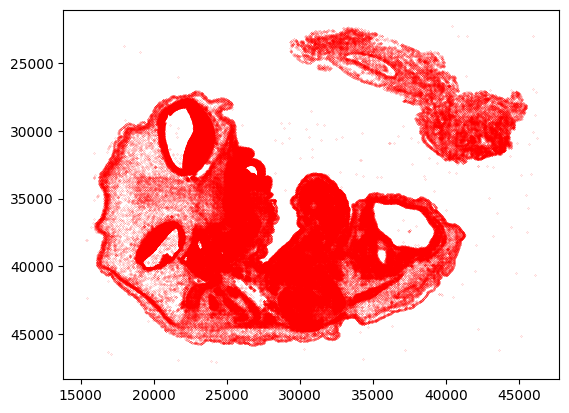

In [318]:
test = features.iloc[inds]
plt.scatter(test['Centroid_x'], test['Centroid_y'], c='r', s=0.01)
plt.gca().invert_yaxis()
plt.show()

In [319]:
print(len(inds))
print(len(xy))

305389
305389


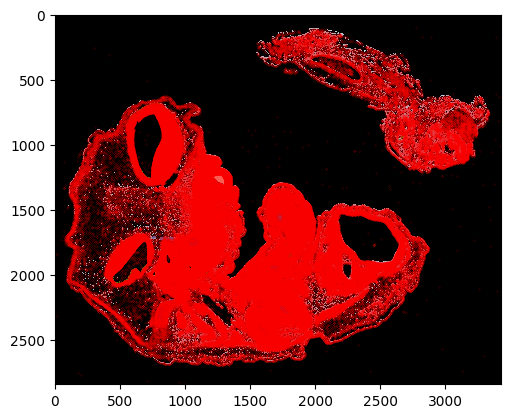

In [320]:
im = im_stack[i]
new_im = np.vectorize(label_mapping.get)(im)

plt.imshow(im, cmap=cmap_var, interpolation='none')

plt.scatter(xy[:,0], xy[:,1], c='r', s=0.01)
#plt.gca().invert_yaxis()

plt.show()

In [321]:
print(max(xy[:,0]))
print(max(xy[:,1]))
print(im.shape)

3418.0
2838.0
(2841, 3432)


In [322]:
np.unique(new_im)

array([ 0,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
       23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
       41, 42, 44, 47, 48, 50, 51, 53, 54, 55, 56, 60, 61, 62, 63, 64, 65,
       66, 72, 73, 74, 75, 76, 79, 80, 82, 84, 85, 87, 89])

In [323]:
total = 0
for key in np.unique(new_im):
    num = len(np.array([point for point in xy if new_im[int(point[1]), int(point[0])] == key]))
    print(key, num)
    total += num
print(total)

0 26103
7 54
8 102
9 15410
10 1372
11 9112
12 129
13 4104
14 4
15 56
16 10791
17 83
18 21392
19 1144
20 13190
21 438
22 6126
23 2943
24 827
26 10
27 1
28 665
29 1603
30 11
31 529
32 1139
33 270
34 10071
35 85657
36 5628
37 8445
38 49373
39 22343
40 1073
41 4321
42 5
44 0
47 0
48 0
50 315
51 7
53 5
54 215
55 18
56 9
60 76
61 36
62 0
63 4
64 36
65 4
66 0
72 2
73 8
74 0
75 0
76 13
79 2
80 0
82 0
84 16
85 64
87 2
89 33
305389


In [324]:
len(xy_class)

21392

In [325]:
len(inds_class)

21392

In [326]:
len(inds)

305389

C:\Users\Donald\AppData\Local\Temp\ipykernel_25464\3604808688.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  xy_class_w_ind = np.array([(index, point) for index, point in zip(inds, xy) if new_im[int(point[1]), int(point[0])] == lab])


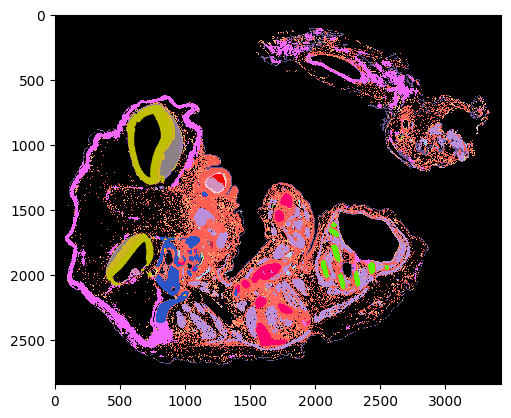

In [327]:
im = im_stack[i]
new_im = np.vectorize(label_mapping.get)(im)

plt.imshow(new_im, cmap=cmap_var, interpolation='none')

lab = 18

#xy_class = np.array([point for point in xy if new_im[int(point[1]), int(point[0])] == lab])
xy_class_w_ind = np.array([(index, point) for index, point in zip(inds, xy) if new_im[int(point[1]), int(point[0])] == lab])

inds_class = [index for index, _ in xy_class_w_ind]
xy_class = np.array([coordinates for _, coordinates in xy_class_w_ind])

plt.scatter(xy_class[:,0], xy_class[:,1], c='y', marker='+', s=1)
#plt.gca().invert_yaxis()

plt.show()

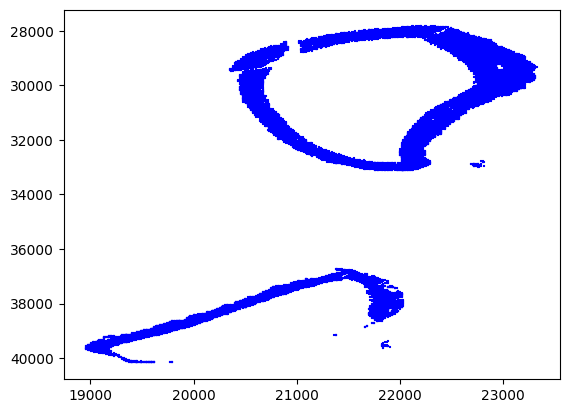

In [332]:
test = features.iloc[inds_class]
plt.scatter(test['Centroid_x'], test['Centroid_y'], c='b', marker='+', s=1)
plt.gca().invert_yaxis()
plt.show()

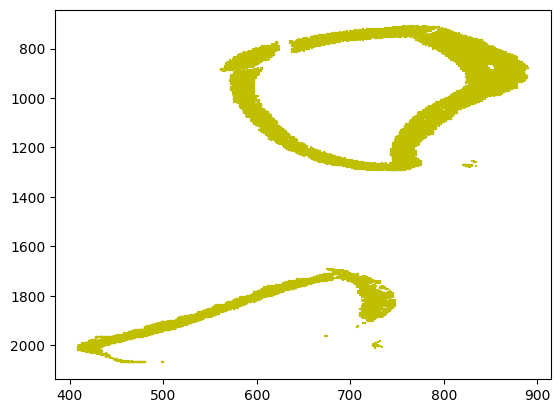

In [333]:
plt.scatter(xy_class[:,0], xy_class[:,1], c='y', marker='+', s=1)
plt.gca().invert_yaxis()
plt.show()

In [334]:
features.iloc[inds_class]

,Centroid_x,Centroid_y,Area,Perimeter,Circularity,Aspect Ratio,compactness,eccentricity,extent,form_factor,maximum_radius,mean_radius,median_radius,minor_axis_length,orientation_degrees,r_mean_intensity,g_mean_intensity,b_mean_intensity
7571,20912.0,28576.0,100.56250,36.562500,0.945312,1.134766,13.296875,0.472656,0.776855,1.057617,6.312500,5.664062,5.714844,10.679688,6924.0,139.1250,112.3125,159.625
7572,21264.0,28304.0,111.62500,38.437500,0.950195,1.179688,13.226562,0.530762,0.775391,1.052734,7.238281,5.957031,5.984375,11.046875,9376.0,141.3750,114.2500,166.625
7573,21376.0,28240.0,149.62500,44.218750,0.960938,1.120117,13.078125,0.450439,0.770020,1.041016,8.023438,6.910156,6.937500,13.164062,5520.0,140.7500,111.0000,164.875
7574,21408.0,28256.0,115.37500,39.437500,0.932617,1.306641,13.468750,0.644043,0.775879,1.072266,8.039062,6.023438,5.738281,10.664062,6828.0,146.6250,116.8125,168.875
7575,22144.0,28224.0,107.12500,37.843750,0.939453,1.187500,13.375000,0.539551,0.772461,1.064453,6.730469,5.843750,5.753906,10.804688,8704.0,150.6250,120.6875,171.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150693,19136.0,39616.0,38.03125,28.640625,0.582520,3.027344,21.562500,0.943848,0.745117,1.716797,6.839844,3.228516,2.589844,4.105469,8432.0,110.1875,85.5625,149.500
150695,21216.0,37056.0,42.90625,25.562500,0.825195,1.439453,15.226562,0.719238,0.762695,1.211914,4.882812,3.660156,3.695312,6.250000,6928.0,145.3750,115.0625,167.750
150704,19024.0,39552.0,29.53125,21.609375,0.793945,1.389648,15.820312,0.694336,0.762207,1.258789,4.480469,2.996094,3.121094,5.277344,6492.0,149.3750,113.8125,164.250
150705,21536.0,36960.0,57.65625,30.062500,0.801758,1.707031,15.671875,0.810547,0.751953,1.247070,6.066406,4.214844,4.136719,6.703125,4320.0,140.2500,106.9375,165.000


In [342]:
def get_class_inds(label, xy, inds, new_im):
    xy_class_w_ind = np.array([(index, point) for index, point in zip(inds, xy) if new_im[int(point[1]), int(point[0])] == label])
    
    inds_class = [index for index, _ in xy_class_w_ind]
    xy_class = np.array([coordinates for _, coordinates in xy_class_w_ind])
    
    return inds_class, xy_class

C:\Users\Donald\AppData\Local\Temp\ipykernel_25464\2063956589.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  xy_class_w_ind = np.array([(index, point) for index, point in zip(inds, xy) if new_im[int(point[1]), int(point[0])] == label])


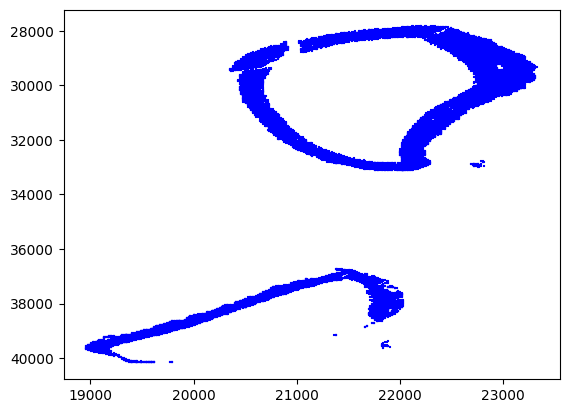

In [356]:
inds_18, xy_18 = get_class_inds(18, xy, inds, new_im)
df_18 = features.iloc[inds_18]
plt.scatter(df_18['Centroid_x'], df_18['Centroid_y'], c='b', marker='+', s=1)
plt.gca().invert_yaxis()
plt.show()

C:\Users\Donald\AppData\Local\Temp\ipykernel_25464\2063956589.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  xy_class_w_ind = np.array([(index, point) for index, point in zip(inds, xy) if new_im[int(point[1]), int(point[0])] == label])


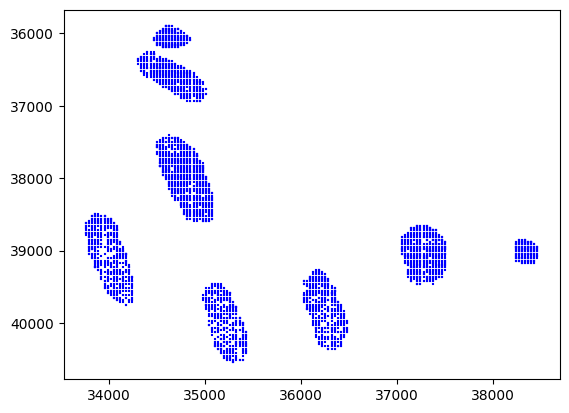

In [359]:
inds_13, xy_13 = get_class_inds(13, xy, inds, new_im)
df_13 = features.iloc[inds_13]
plt.scatter(df_13['Centroid_x'], df_13['Centroid_y'], c='b', marker='+', s=1)
plt.gca().invert_yaxis()

plt.show()

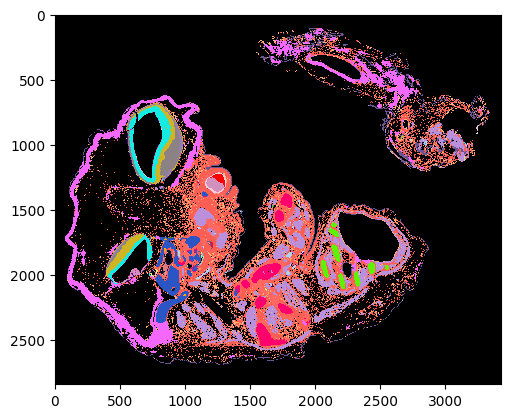

In [355]:
plt.imshow(new_im, cmap=cmap_var, interpolation='none')
plt.show()

In [360]:
# limbs I think
df_13.head()

,Centroid_x,Centroid_y,Area,Perimeter,Circularity,Aspect Ratio,compactness,eccentricity,extent,form_factor,maximum_radius,mean_radius,median_radius,minor_axis_length,orientation_degrees,r_mean_intensity,g_mean_intensity,b_mean_intensity
123980,34560.0,36032.0,98.37500,36.250000,0.940430,1.077148,13.367188,0.372070,0.771973,1.063477,6.492188,5.597656,5.636719,10.875000,5680.0,133.750,103.1250,159.000
123982,34560.0,36128.0,112.56250,39.531250,0.905762,1.277344,13.875000,0.622559,0.768555,1.104492,7.515625,5.968750,5.773438,10.703125,8064.0,125.250,97.8750,158.125
123990,34560.0,36576.0,127.87500,40.875000,0.960938,1.069336,13.078125,0.354004,0.771973,1.041016,7.796875,6.371094,6.292969,12.445312,2136.0,130.250,103.4375,158.500
124005,34528.0,36032.0,78.87500,35.187500,0.801270,1.706055,15.687500,0.810059,0.757812,1.248047,6.953125,4.929688,4.691406,7.812500,3954.0,137.375,111.8125,165.000
124013,34560.0,36512.0,54.53125,29.234375,0.801270,1.140625,15.687500,0.480713,0.761719,1.248047,5.031250,4.164062,4.203125,7.921875,1022.0,152.625,127.6875,175.500


In [361]:
# ventricular
df_18.head()

,Centroid_x,Centroid_y,Area,Perimeter,Circularity,Aspect Ratio,compactness,eccentricity,extent,form_factor,maximum_radius,mean_radius,median_radius,minor_axis_length,orientation_degrees,r_mean_intensity,g_mean_intensity,b_mean_intensity
123980,34560.0,36032.0,98.37500,36.250000,0.940430,1.077148,13.367188,0.372070,0.771973,1.063477,6.492188,5.597656,5.636719,10.875000,5680.0,133.750,103.1250,159.000
123982,34560.0,36128.0,112.56250,39.531250,0.905762,1.277344,13.875000,0.622559,0.768555,1.104492,7.515625,5.968750,5.773438,10.703125,8064.0,125.250,97.8750,158.125
123990,34560.0,36576.0,127.87500,40.875000,0.960938,1.069336,13.078125,0.354004,0.771973,1.041016,7.796875,6.371094,6.292969,12.445312,2136.0,130.250,103.4375,158.500
124005,34528.0,36032.0,78.87500,35.187500,0.801270,1.706055,15.687500,0.810059,0.757812,1.248047,6.953125,4.929688,4.691406,7.812500,3954.0,137.375,111.8125,165.000
124013,34560.0,36512.0,54.53125,29.234375,0.801270,1.140625,15.687500,0.480713,0.761719,1.248047,5.031250,4.164062,4.203125,7.921875,1022.0,152.625,127.6875,175.500
